# Use case for Python Tuple

Most Python programmers are guilty (me included) of always using List without even considering Tuple at all. Surely for some use cases, Tuple should be better right? Keep reading for one such case.

# Tuple Introduction

Tuple is like List but immutable so it has lesser in built methods. Tuples are faster than Lists, it is noticeable only when size of the tuple is considerably large.If you want a refresher, check out this [blog](https://medium.com/@GalarnykMichael/python-tuples-and-tuple-methods-4817a6bb6fff) by [Michael Galarnyk](https://medium.com/@GalarnykMichael).


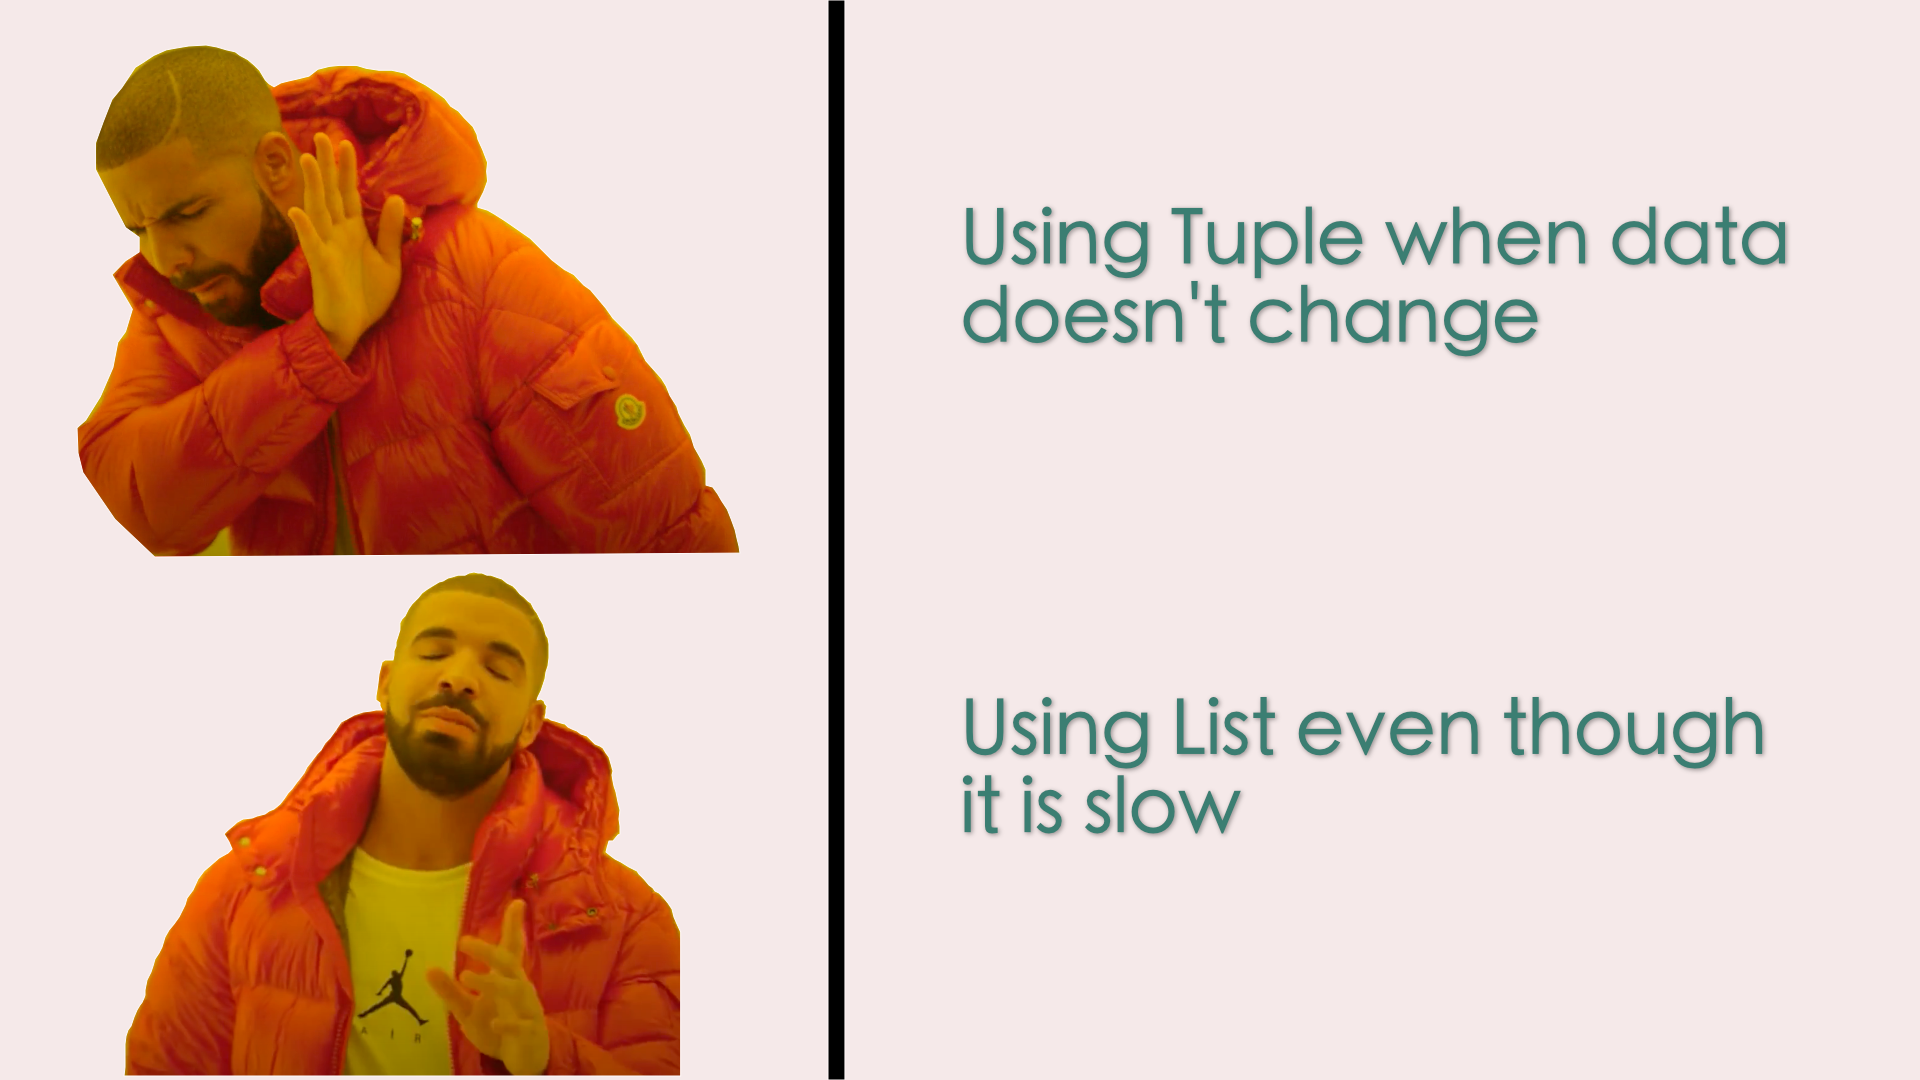

# Caveat

A general rule of thumb is to use Tuple when the data will or should not change.

In [10]:
tup = (1,[2])
tup[0] = 3

TypeError: 'tuple' object does not support item assignment

This does not mean you really can't change a tuple element. If the underlying tuple element is mutable then we can change it. This could lead to unintended side effects. For example, children/inherited class can modify a tuple element initialised by the parent class.

In [14]:
tup[1].append(3)
print(tup)

(1, [2, 3])


# Use Case

Personally, I am more into Deep Learning and have to deal with image files a lot. Image files have many popular formats like jpg, png and svg etc. We often have a situation where we have to find all files of certain types from a folder. There are many ways of going about this. We will explore few options.

## Option 1: Using List

In [18]:
%%timeit
# List of files in the folder
all_files = ['cat.jpg', 'dog.png', 'report.docx', 'sales.csv']

# List of image file extensions
img_exts_lst = ['jpg','png']

# Filter only image files 
img_files = [file for file in all_files for ext in img_exts_lst if file.endswith(ext)]

#print(img_files) # ['cat.jpg', 'dog.png']

1.77 µs ± 22.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


The filtering based on the extension type is done with the help of `endswith` method. Since the `endswith` method does not accept list we are looping through all the extension elements.
The code **looks readable** and takes about **2 microseconds** which is not bad, but for every extension type, we have to run through all the files one more time. I have a suspicion that we can do much better.

## Option 2: Using Tuple

In [15]:
%%timeit

# List of files in the folder
all_files = ['cat.jpg', 'dog.png', 'report.docx', 'sales.csv']

# Tuple of image file extensions
img_exts_tup = ('jpg','png')

# Filter only image files 
img_files = [file for file in all_files if file.endswith(img_exts_tup)]

#print(img_files) # ['cat.jpg', 'dog.png']

965 ns ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Almost similar code but we are able to pass the entire Tuple as parameter to the `endswith` method. This removes the extra loop and makes the code even **shorter**. The code now runs **about 2 times faster.**

# Takeaway

Some methods like `startswith` and `endswith` accept Tuple as parameter, if the data does not change then better to use Tuple or convert List to Tuple before passing the data to the method. Tuples make the code look more **elegant** and run **faster**. Also, don't forget about the caveat. If you have any questions or thoughts, feel free to reach out via [Twitter](https://twitter.com/6aravind).